# Introduction to Quantum Machine Learning

## Overview and motivation

Welcome to quantum machine learning!

The video below will give a brief introduction that is supplemented by the text below.

<iframe src="https://video.ibm.com/embed/recorded/133981151" style="border: 0;" webkitallowfullscreen="" allowfullscreen frameborder="no" width="480" height="270"></iframe>

To briefly recap and augment the video:

- Quantum computing has entered the era of utility, meaning that we can begin to use quantum computers to solve real-world problems.
- We have seen a problem be solved for the first time on a quantum computer, and then subsequently people find a way to do it on a classical supercomputer. This cycle of classical and quantum computing pushing each other to their limits will likely continue for a few years.
- There are specific problems where quantum computing can have a provable advantage over classical computing, given progress in areas such as reduction of errors and the number of qubits available. But this is still a time of exploration, searching for quantum-amenable datasets and useful quantum feature maps.
- Quantum machine learning (QML) is one of many exciting areas where quantum computing can augment or complement existing classical workflows.

Machine learning (ML) applies algorithms to data sets, and so QML might plausibly include quantum mechanics in either the data or algorithmic sides, or both. All of these possibilities are potentially interesting. But we will mostly restrict ourselves to discussions of quantum algorithms applied to classical data. One reason for this is that ML problems with classical data are already so well studied and widely available. There is broad interest in solving problems that start with classical data. Another reason is the lack of QRAM. Without the ability to store large amounts of quantum data on a relatively long timescale, methods that begin with quantum data are still fairly far from applicability to industry. It is also unclear how to "quantumly-access" classical data in an efficient manner. Two types of ML of particular interest are supervised learning, in which you train an algorithm using a labeled data set, and unsupervised learning, in which the algorithm attempts to learn about a distribution from unlabeled samples. An unsupervised algorithm might, for example, learn how to generate new samples from the same distribution, or how to cluster the samples into groups with similar characteristics.

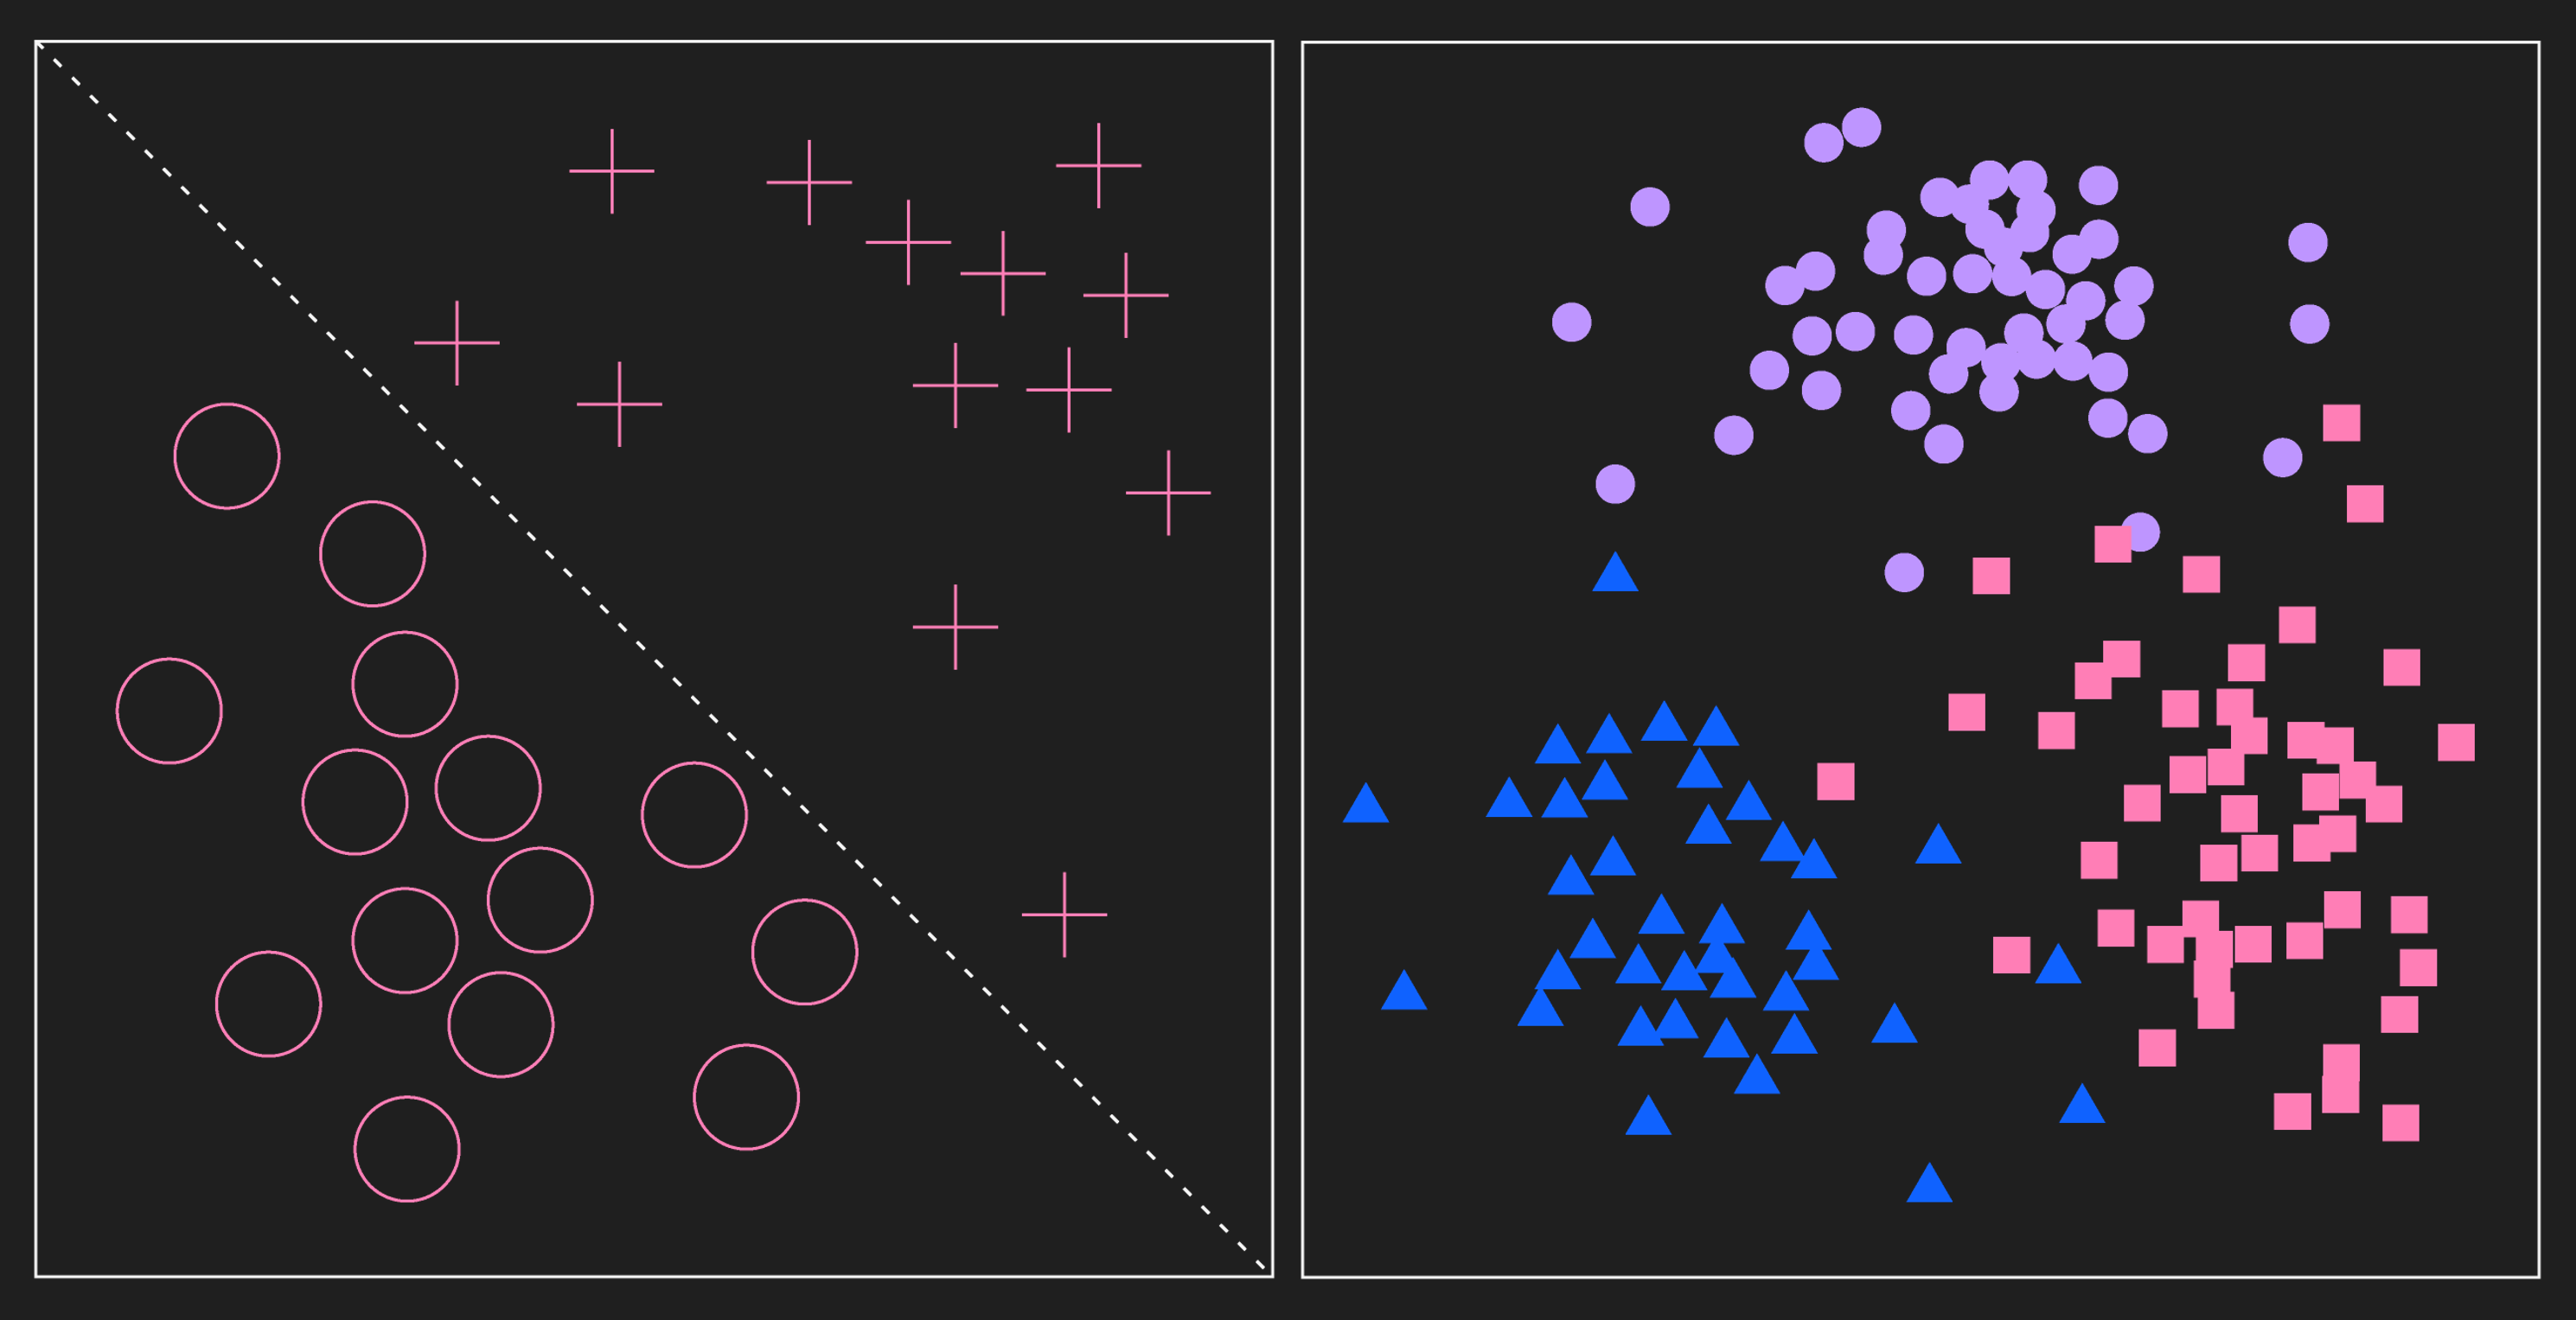

Those with background in machine learning will already know that many solution methods involve mapping data into higher-dimensional spaces. This is especially well-explored in the context of kernels. As a brief reminder, sometimes data may be separable into categories by a line, plane, or hyperplane (we will often simply say "hyperplane" for compactness), in the same number of dimensions as the data are given. This is shown in the first image above. Other times, data may not be separable by a hyperplane in those dimensions, as shown in the second image. But there can still be structure to the data that can be exploited in a mapping to higher dimensions, which then leaves the data separable in that higher-dimensional space. This is illustrated in the mapping of the 2D data with circular symmetry into the 3D space in which the data points are arranged along a paraboloid surface.

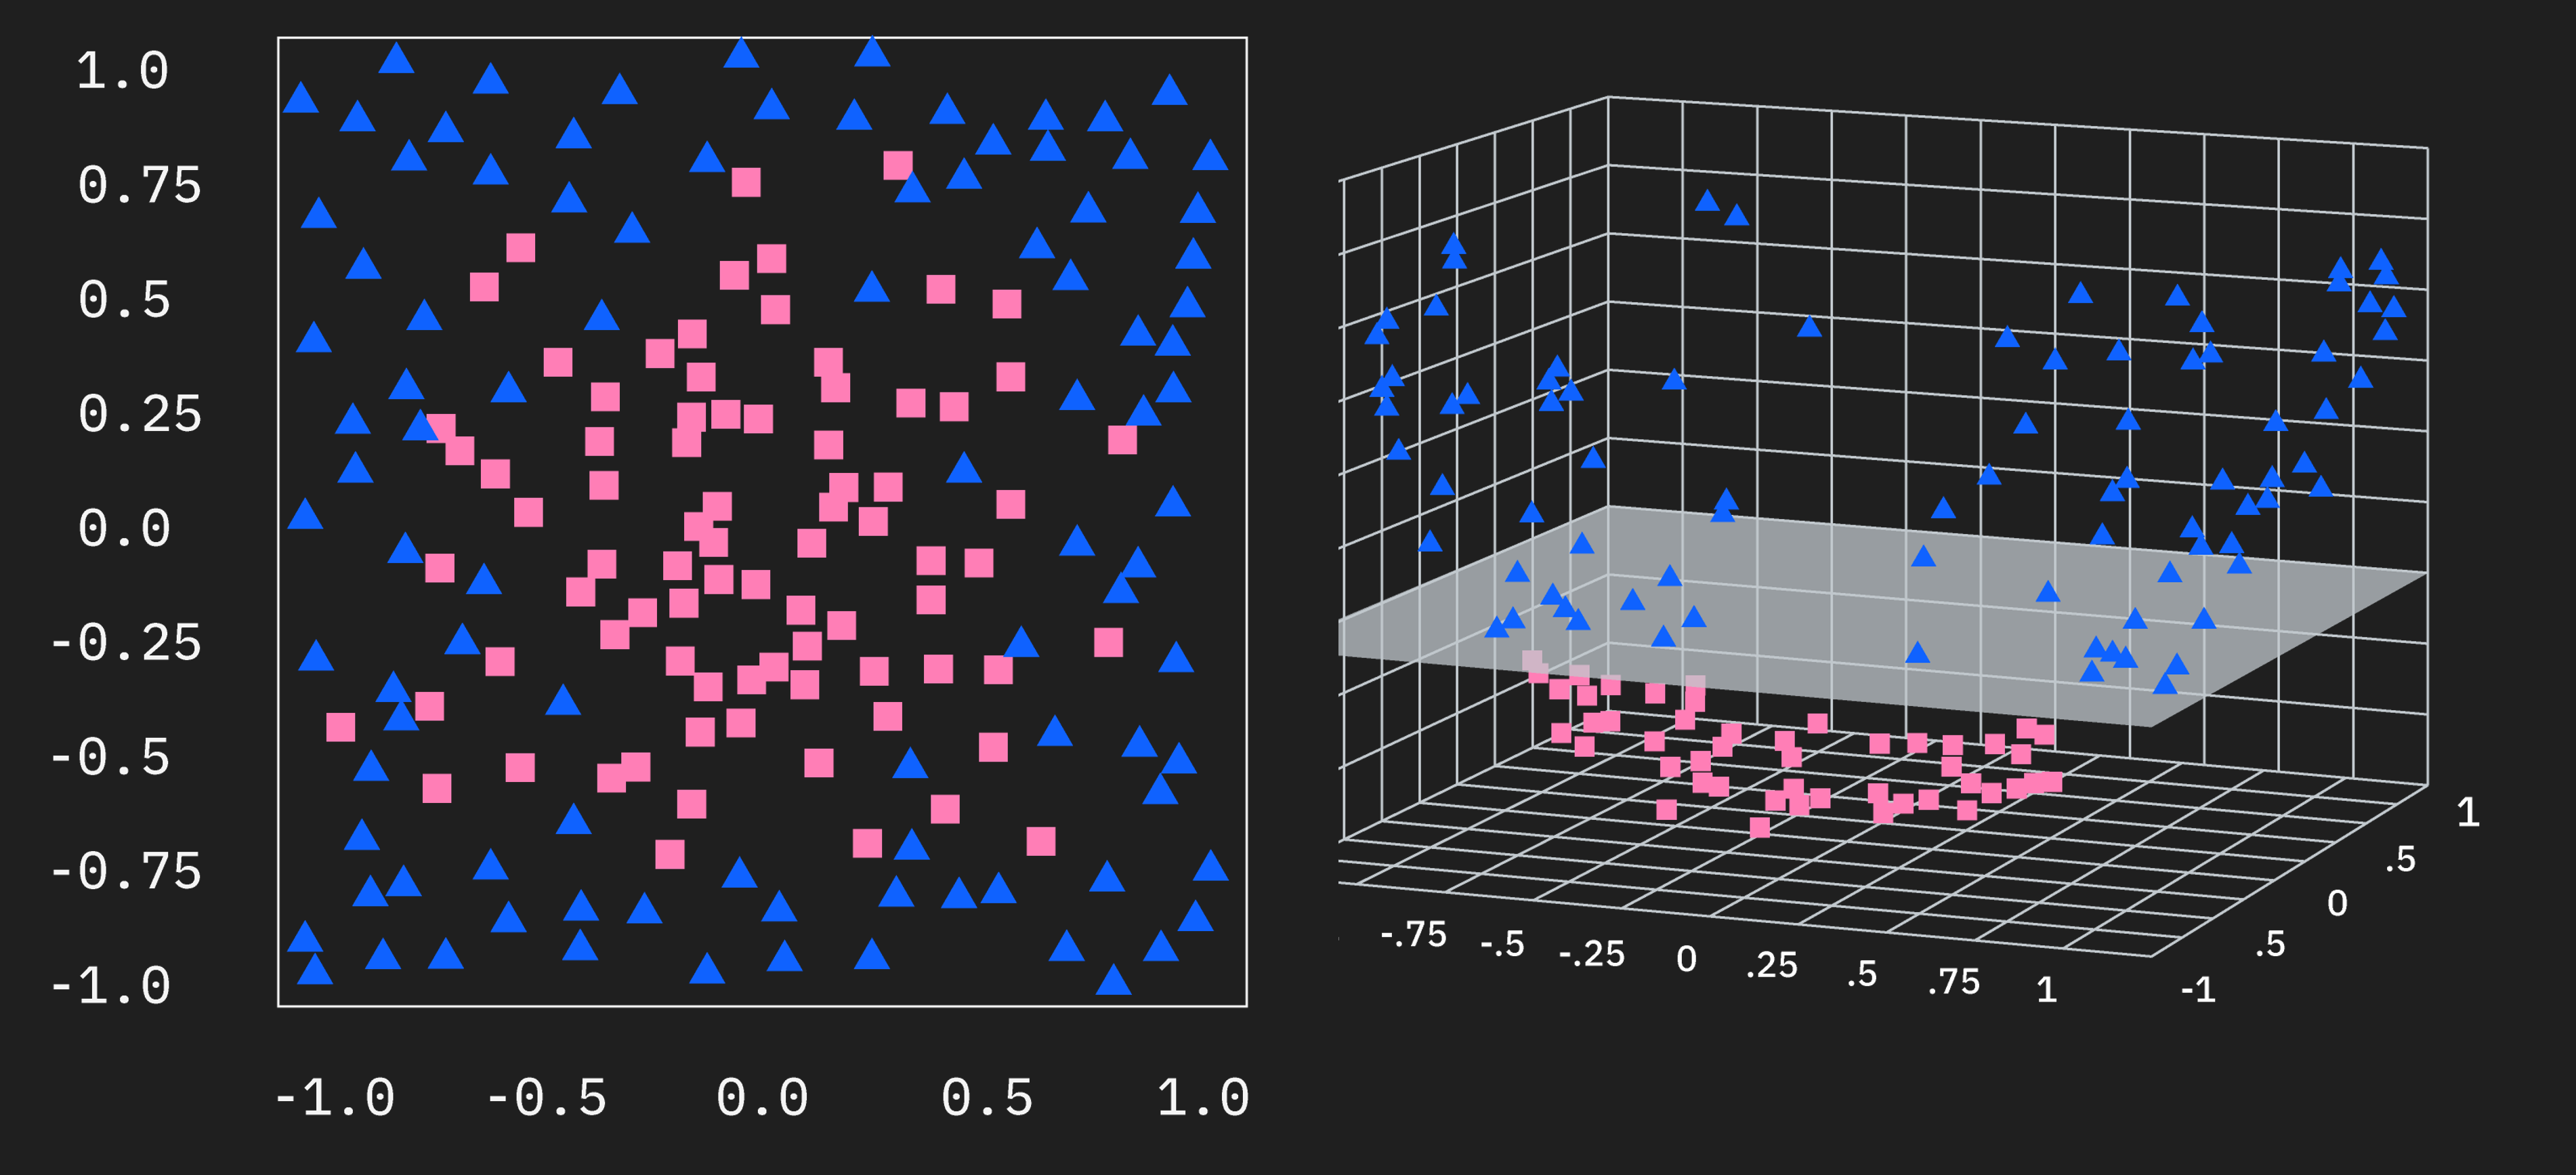

A common goal in QML is to find a mapping from the lower-dimensional set of features into a higher-dimensional space, that effectively separates our data points so we can use the mapping to classify new data points. [](KTemme)
But this is not an easy task, and any discussion of the potential usefulness of quantum computing in machine learning must be accompanied by the appropriate caveats. In particular, we must address the nuance in dataset selection and the challenges in reaching utility scale. We must also shift away from trying to outperform classical ML algorithms on data that are already handled efficiently and well by classical algorithms and refocus the discussion to investigating new feature maps that could be useful.

## Managing expectations

Many data sets used in QML applications described in literature are “feature engineered”, meaning a dataset is selected or generated specifically to show a narrow use case in which quantum computing is useful. If this seems like cheating then we’re misunderstanding the task at hand. It is __not__ the case that some quantum feature maps enable us to solve all or many classification tasks more efficiently or scalably than classical machine learning algorithms. Rather, some quantum feature maps (not all) behave differently from classical feature maps. The task at hand is then to explore quantum circuits in the context of complex data structures. Some specific questions to address are:
1.	What quantum circuits are most likely to behave in novel ways, compared to classical alternatives?
2.	Are there real-world problems that involve data with properties best explored using such novel quantum circuits?
3.	Do these quantum circuits scale on near-term quantum computers?

### Insufficient explanation

One often encounters a simplified explanation of how quantum computing can be powerful. It goes something like this:

Just as classical computers use bits of information, quantum computers use qubits. Given a number of bits, say 4, a classical computer can take on any one of $2^4 = 16$ possible states, whereas a quantum computer can exist in a superposition of all 16 states simultaneously, and operations can be performed on this entire superposition. In some cases, this naturally allows us to design potentially interesting learning algorithms based on mappings to higher dimensional spaces.

This is a true statement, but it is inadequate, and a bit misleading. See below. One also sees the differences between complex and real coefficients emphasized, as in:

A probabilistic classical system in which a system can be described as having certain probabilities of being in different states, can be described as follows.
$$
|s\rangle = a|0000\rangle+b|0001\rangle+c|0010\rangle+... a, b, c \in \reals
$$
In such a system, the coefficients $a$, $b$, $c$, and so on can only be meaningful if they are positive, real numbers. The states in quantum computers are described by probability amplitudes that can be complex numbers.

$$
|\psi \rangle = A|0000\rangle+B|0001\rangle+C|0010\rangle+... A, B, C \in \mathbb{C}
$$

The above statements have been made very carefully such that they are true (many superficially similar statements are incorrect). But these correct statements are not an explanation of the power of quantum computing in machine learning. For one thing, any application of quantum computing  to machine learning will involve measurements and we cannot measure a qubit to be in multiple states at once. We can prepare a qubit in a superposition like $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$ but a measurement will yield either $|0\rangle$ or $|1\rangle$. So at a bare minimum, this story about increasing dimensionality is incomplete. Further, in the context of kernels, increased dimensions in quantum computing cannot be a sufficient condition for computational power over classical alternatives, since Gaussian kernels are infinite dimensional. There are subtleties there, in that Gaussian feature maps are only used in conjunction with the “kernel trick” that sidesteps the need to ever calculate an infinite-dimensional mapped vector. But the point remains:

__High dimensionality of entangled quantum states is not exponential parallelism, and is not a sufficient condition for increased power in machine learning.__

In the lessons that follow, we present workflows for incorporating quantum circuits into machine learning tasks, and we do this for the explicit purpose of facilitating exploration of the power of quantum computing. No feature map or algorithm in this course is put forth as a quick path to better machine learning results for general problems, because no such feature map or algorithm exist. Rather, we present a wide array of quantum tools to be used in exploration of useful quantum computing.

### Dequantization

Dequantization refers to the replacement of a given quantum algorithm with a classical one that performs similarly to a quantum algorithm for a given set of tasks, typically including scaling. By some definitions, the classical algorithm should perform only polynomially slower than the quantum algorithm. 

Several quantum machine learning (QML) algorithms that were initially thought to provide significant speedups over classical algorithms have been dequantized in recent years. This process of dequantization has led to important insights into the potential advantages and limitations of quantum approaches to machine learning.

One of the most notable dequantization results came from Ewin Tang's [work on recommendation systems](https://arxiv.org/abs/1807.04271) Tang discovered a classical algorithm that could perform recommendation tasks at speeds previously thought to be achievable only by quantum computers. This discovery challenged the assumption that quantum algorithms had an exponential advantage for this problem. More recent work by [Shin et al.](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.6.023218) has focused on identifying conditions on the dequantizability of a variational quantum machine learning model's function class.

One common approach to dequantization (though not the only trick) is through consideration of data loading overhead. That is, any quantum algorithm applied to classical data will have a step in which classical data are encoded into the quantum computer. If a quantum algorithm assumes a starting point at which quantum data are already available, then one effectively hides the time required for encoding. There are contexts in which assuming quantum data may be reasonable, but many applications of interest will start with classical data. Some dequantization cases have shown that when this encoding time is included, and when classical data loading can be accomplished efficiently, the quantum algorithm no longer outperforms its classical counterpart.

Even if an algorithm cannot be dequantized, that does not mean it is more efficient or scalable than all classical algorithms. As an extreme, contrived example: imagine an algorithm to select the largest j elements from a set of size k. One could write a quantum algorithm that uses Shor’s algorithm to factor each of the k elements into prime factors, and then determine the largest elements using the prime factors. Such an algorithm likely cannot be dequantized, but is drastically less efficient than classical algorithms to accomplish the same selection of largest elements (though not the unnecessary factoring part).

## Existence proof

In 2021, IBM Quantum researchers Yunchao Liu, Srinivasan Arunachalam, and Kristan Temme published a paper in Nature, [A rigorous and robust quantum speed-up in supervised machine learning.](https://www.nature.com/articles/s41567-021-01287-z) Consistent with the above caveats, a classification problem was carefully chosen for this work that is (1) known to be classically hard, and (2) suitable for quantum algorithms to show a speed-up.

The paper addresses the classification of data based on discrete logarithms. To quote the paper, “For a large prime number $p$ and a generator $g$ of $\mathbb{Z}^*_p = {1, 2, . . . , p − 1}$, it is a widely-believed conjecture that no classical algorithm can compute $\text{log}_g(x)$ on input $x \in \mathbb{Z}^*_p $, in time polynomial in $n = \lceil{\text{log}_2(p)}\rceil$, the number of bits needed to represent $p$.” In contrast, [Shor’s algorithm](https://epubs.siam.org/doi/10.1137/S0097539795293172) is known to solve the discrete log problem in polynomial time. This choice of problems thus simultaneously satisfies the criteria above: classical hardness (unlikely to be dequantized), and known to be suitable for quantum algorithms.

Through this judicious choice of classification problem, the authors were able to show an exponential speed-up using quantum algorithms that is both end-to-end and robust. Here, “end-to end” refers to the assumptions about starting with classical data; the authors in this case do include the time for data encoding. Here, “robust” refers to the fact that the data to be classified are separated by a wide margin using the quantum algorithm, such that the classification success is robust to real-world considerations like finite sampling error.

All this is to say that problems do exist in which quantum algorithms can yield an exponential speed-up. But the current state of the science is that such problems are selected based on observations or theoretical justification that they should be amenable to quantum algorithms. It is not realistic to expect a quantum speed-up for machine learning tasks that classical computers already do quite well.

Identifying such ideal cases for the exploration of quantum utility is an enormous responsibility for learners in this course. And it is not a task that can be accomplished in a course such as this. That exploration is a task for the IBM Quantum Network as a whole, made up of researchers like yourself. This course will demonstrate QML workflows and encoding strategies so that you can begin to explore for quantum utility in your area of subject matter expertise.

We hope this introduction has made a few things clear about quantum machine learning: 
1. It has been shown that quantum algorithms can offer an exponential speed-up over classical algorithms for very specific problems that are classically hard, and well-suited to quantum algorithms.
2. High dimensionality of entangled states in quantum computing matters, but it is not sufficient to simply gain an advantage over classical algorithms.
3. Finding problems that are well-suited to quantum algorithms is an extremely difficult task, and one that will largely fall to the learners in this course.

## Check-in questions

<details>
<summary> What makes quantum states different from classical states? </summary>
Answer:

A lot. Notably: complex coefficients, and superposition with a single copy. There are many other differences that will discussed in future lessons, including entanglement, and interference.</details>

<details>
<summary> True or False? Highly entangled quantum states enable us to solve most machine learning problems more efficiently on a quantum computer. </summary>

Answer:

False. Most machine learning problems are solved very efficiently by classical algorithms and quantum algorithms are not likely to offer any substantial speed-up. The goal in QML is to finding datasets with features that are well-described by quantum states and/or to find mappings of data features that optimize the accuracy of models.[](/KTemme)
</details>



## Course learning goals

Through completing this course, you can expect to build the following core skills and competencies. Learners will be able to:

1.       Explain what QML is and where quantum connects to classical machine learning.

2.       Apply quantum vocabulary and key terms to ML workflows.

3.       Identify key components of a QML workflow (various types).

4.       Identify different types of QML and distinguish between them.

5.       Implement quantum kernel methods and variational quantum classifiers using Qiskit Runtime primitives and following Qiskit patterns.

6.       Identify where QML is most promising and where it is not.

7.       Adjust an example problem to their own data set.

8.       Be aware of issues in QML like training time, noise, and compounding error in multiple-state readouts.

9. Make recommendations for where QML might benefit their organization.


## Course structure

This course is made up of several lessons. Each lesson has several check-in questions throughout the text, so you can practice new skills or check your understanding as you go. These are not required.

At the end of the course, there is a 20-item quiz. You must score at least 80% on this quiz in order to obtain your Quantum Machine Learning badge, via Credly. If you score at least 80%, your badge will be automatically emailed to you, shortly thereafter. There is a limit to the number of times this quiz can be taken. See the quiz for further details.

The course structure is as follows:

- Lesson 1: Introduction and overview
- Lesson 2: Recap of machine learning
- Lesson 3: Data encoding
- Lesson 4: Quantum kernel methods and support vector machines
- Lesson 5: Variational quantum classifiers / neural networks
- Exam for badge

## Run your first QML code

It is often helpful to see where we're going, before breaking it down into pieces, and delving into background. The code cells below carry out a simple instance of a quantum kernel method. Specifically, a single kernel matrix element is calculated. Users new to kernel methods or quantum kernels should not be intimidated by this; multiple lessons in this course will be devoted to dissecting exactly what is being done in these cells.

With this code we simultaneously introduce Qiskit patterns: a framework for approaching quantum computing at the utility scale. This framework consists of four steps that are very general and can be applied to most problems (though in some workstreams, certain steps may be iterated multiple times).

### Qiskit patterns:

* Step 1: Map classical inputs to a quantum problem
* Step 2: Optimize problem for quantum execution
* Step 3: Execute using Qiskit Runtime Primitives
* Step 4: Analyzing / post-processing

In the cells below, we offer only cursory explanations of the various steps, just enough for you to find the appropriate lesson to learn more.

In [1]:
#Step 1: Map classical inputs to a quantum problem:

#Start by getting some appropriate data. The data imported below consist of 128 rows or data points.
#Each row has 14 columns that correspond to data features, and a 15th column with a label (+/-1).
!wget https://raw.githubusercontent.com/qiskit-community/prototype-quantum-kernel-training/main/data/dataset_graph7.csv

#Import some required packages, and write a function to pull some training data out of the csv file you got above.
import pandas as pd
import numpy as np

def get_training_data():
    """Read the training data."""
    df = pd.read_csv("dataset_graph7.csv", sep=",", header=None)
    training_data = df.values[:20, :]
    ind = np.argsort(training_data[:, -1])
    X_train = training_data[ind][:, :-1]

    return X_train

#Import some qiskit packages required for setting up our quantum circuits.
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import UnitaryOverlap

# Prepare training data
X_train = get_training_data()

# Empty kernel matrix
num_samples = np.shape(X_train)[0]

# Prepare feature map for computing overlap between two data points.
# This could be pre-built feature maps like ZZFeatureMap, or a custom quantum circuit, as shown here.
num_features = np.shape(X_train)[1]
num_qubits = int(num_features / 2)
entangler_map = [[0, 2], [3, 4], [2, 5], [1, 4], [2, 3], [4, 6]]
fm = QuantumCircuit(num_qubits)
training_param = Parameter("θ")
feature_params = ParameterVector("x", num_qubits * 2)
fm.ry(training_param, fm.qubits)
for cz in entangler_map:
    fm.cz(cz[0], cz[1])
for i in range(num_qubits):
    fm.rz(-2 * feature_params[2 * i + 1], i)
    fm.rx(-2 * feature_params[2 * i], i)

# Pick two data points, here 14 and 19, and assign the features to the circuits as parameters.
x1 = 14
x2 = 19
unitary1 = fm.assign_parameters(list(X_train[x1]) + [np.pi / 2])
unitary2 = fm.assign_parameters(list(X_train[x2]) + [np.pi / 2])

# Create the overlap circuit
overlap_circ = UnitaryOverlap(unitary1, unitary2)
overlap_circ.measure_all()
overlap_circ.draw("mpl", scale=0.6, style="iqp")

# Step 2: Optimize problem for quantum execution

# Use Qiskit Runtime service to get the least busy backend
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=overlap_circ.num_qubits
)

#Transpile the circuits optimally for the chosen backend using a pass manager.
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
overlap_ibm = pm.run(overlap_circ)

# Step 3: Execute using Qiskit Runtime Primitives

# Import QuasiDistribution for interpreting outputs, and StatevectorSampler as our sampler. 
from qiskit.result import QuasiDistribution
from qiskit.primitives import StatevectorSampler

# Specify the number of shots to use.
num_shots = 10_000

## Evaluate the problem using statevector-based primitives from Qiskit
sampler = StatevectorSampler()
counts = (
    sampler.run([overlap_circ], shots=num_shots).result()[0].data.meas.get_int_counts()
)

# Step 4: Analyzing / post-processing

#Use QuasiDistribution to get the probabilities of various states, and then find the probability of 0.
dist = QuasiDistribution(
    {meas: count / num_shots for meas, count in counts.items()}, shots=num_shots
)
dist.get(0, 0.0)

--2024-06-04 05:54:59--  https://raw.githubusercontent.com/qiskit-community/prototype-quantum-kernel-training/main/data/dataset_graph7.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49405 (48K) [text/plain]
Saving to: ‘dataset_graph7.csv.18’

dataset_graph7.csv. 100%[===================>]  48.25K  --.-KB/s    in 0.03s   

2024-06-04 05:55:00 (1.65 MB/s) - ‘dataset_graph7.csv.18’ saved [49405/49405]



0.8214

Although you don't need to understand all the steps above, we should try to understand the output, so we know why we are doing this. Many processes in machine learning use inner products as part of binary classification (among other things). Quantum mechanics has an obvious connection with this, since the probabilities of measuring various states $|\phi_i\rangle$ are given by the inner product with an initial state $|\psi\rangle$ through the inner product: $P_i = |\langle\phi_i|\psi\rangle|^2$. So what we have done above is created a quantum circuit that contains the features of our two data points, and maps them into the space of a quantum vector, then estimates the inner product in that space via making measurements. This is an example of quantum kernel estimation. Note we only implemented this process for two of the data points (the 14th and 19th). If we did this for all possible pairs, we could take the output (in this case the number 0.821...) and populate a matrix of results describing the overlap between all points in the training data set. This is the "kernel matrix".

## Check-in questions

<details>
<summary> In the process above, we calculated a kernel matrix entry for the 14th and 19th data points. What value should we obtain if we use the same data point twice, here (like 14th and 14th again)? In other words, what should be the diagonal entries in the kernel matrix? Answer this question in the absence of noise, but note that deviations from your answer are possible in the presence of noise.</summary>

Answer:

The diagonals should be 1.0. This process should be calculating the normalized inner product of a vector with itself, which must always be one.</details>